## Computer Vision Classifier

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [10]:
# Data Directories
train_dir = "./data/archive/training_set/training_set" 
val_dir = "./data/archive/test_set/test_set"  

In [11]:
# Load Data
img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size
)

Found 8006 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
# Normalising
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [13]:
# Build Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

Epoch 1/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 317ms/step - accuracy: 0.5771 - loss: 0.6725 - val_accuracy: 0.6382 - val_loss: 0.6238
Epoch 2/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 313ms/step - accuracy: 0.6755 - loss: 0.5993 - val_accuracy: 0.7316 - val_loss: 0.5382
Epoch 3/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 315ms/step - accuracy: 0.7402 - loss: 0.5276 - val_accuracy: 0.7528 - val_loss: 0.5079
Epoch 4/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 314ms/step - accuracy: 0.7850 - loss: 0.4647 - val_accuracy: 0.7751 - val_loss: 0.4850
Epoch 5/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 80s 319ms/step - accuracy: 0.8025 - loss: 0.4255 - val_accuracy: 0.7879 - val_loss: 0.4571
Epoch 6/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 321ms/step - accuracy: 0.8349 - loss: 0.3747 - val_accuracy: 0.7904 - val_loss: 0.4684


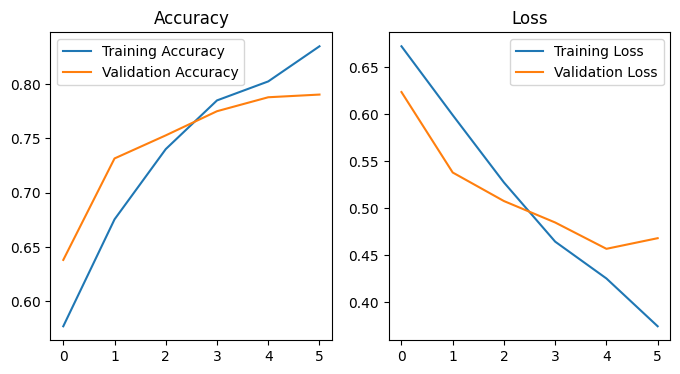

In [17]:
# Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()